In [349]:
import numpy, scipy, os, matplotlib, imageio
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib notebook
import scipy.signal as sg


basefile = '/home/tejaswik/Documents/CurrentProjects/melmot/data'
colHeads=['id','frame','time','RHX','RHY','RHZ','LHX','LHY','LHZ']

parts = os.listdir(basefile)

In [14]:
allpieces = {}
for i in range(0,len(parts),1):
    folder = basefile+parts[i]
    pieces = os.listdir(folder)
    allpieces['{0}'.format(parts[i])] = pieces

    
for key in allpieces:
    for i in range(0,32,1):
        allpieces[key][i] = allpieces[key][i][:-4]

In [159]:
'''this is broken'''
# for key in allpieces:
#     folder = basefile+key
#     pieces = os.listdir(folder)    
#     for i in range(0,len(pieces),1):
#         file1 = folder+'/'+allpieces[key][i]+'.tsv'
#         df1=pd.read_table(file1,header=None)
#         df1.columns=colHeads
# #        allpieces[key][i] = AutoVivification(df1)
#         allpieces[key][i] = {allpieces[key][i]:df1}
#DO YOU EVEN NEED THIS IF INDIV NAME IS STORED IN FILE NAME ITSELF
#this does not let you retrieve keys of keys

'this is broken'

In [335]:
'''Functions'''
def settostrat(stri,y):
    s ='s'+str(y)
    eval(s).append(stri)
    return
    
# def readfile(stri):
#     fil = basefile+'/datadump/'+stri+'.tsv'
#     df1=pd.read_table(fil,header=None)
#     df1.columns=colHeads
#     return(df1)

# def qom(stri):
#     fil = basefile+'/datadump/'+stri+'.tsv'
#     df1=pd.read_table(fil,header=None)
#     df1.columns=colHeads
#     df = df1.iloc[:,2:]
#     qomval = numpy.sqrt(numpy.square(df).sum(axis =1))
#     return(qomval)

    
def readfile(stri):
    fil = basefile+'/normdatadump/'+stri+'.csv'
    df1=pd.read_table(fil,header=None)
    df1.columns=colHeads
    return(df1)

def qom(stri):
    fil = basefile+'/normdatadump/'+stri+'.csv'
    df1=pd.read_table(fil,header=None)
    df1.columns=colHeads
    df = df1.iloc[:,2:]
    qomval = numpy.sqrt(numpy.square(df).sum(axis =1))
    return(qomval)
    
def getlhrh(stri):
    lh = makedf(stri)[:,2:4]
    rh = makedf(stri)[:,5:7]
    return(lh,rh)
    
def upsamp(stri):
    y = readfile(stri)
    y = sg.resample(y,600)
    y = scale(y, axis=0, with_mean=True, with_std=True, copy=True )
    y = pd.DataFrame(y)
    return(y)


def returnDetails(string):
    split = string.split('_')
    partID = split[0]
    melID = split[1]
    typeID = split[2]
    return{'partID':partID, 'melID':melID, 'typeID':typeID}

class AutoVivification(dict):
    """Implementation of perl's autovivification feature."""
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

In [323]:
'''Finding all pieces that have MelID bet 1 and 16'''
normMels = []
synMels = []
im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]
alljo, allim, allsc, allvo = ([] for i in range(4))
s1,s2,s3,s4,s5,s6 = ([]for i in range(6))

folder = basefile+'/datadump/'
pieces = os.listdir(folder)
for i in range(0,len(pieces),1):
    pieces[i] = pieces[i][:-4]
    melID = returnDetails(pieces[i])['melID']
    typeID = returnDetails(pieces[i])['typeID']
    settostrat(pieces[i],typeID) #distribute according to piece ID
    if int(melID) <= 16:
        normMels.append(pieces[i])
    elif int(melID)>16:
        synMels.append(pieces[i])
    if int(melID) in im:
        allim.append(pieces[i])
    elif int(melID) in jo:
        alljo.append(pieces[i])
    elif int(melID) in sc:
        allsc.append(pieces[i])
    elif int(melID) in vo:
        allvo.append(pieces[i])

<IPython.core.display.Javascript object>


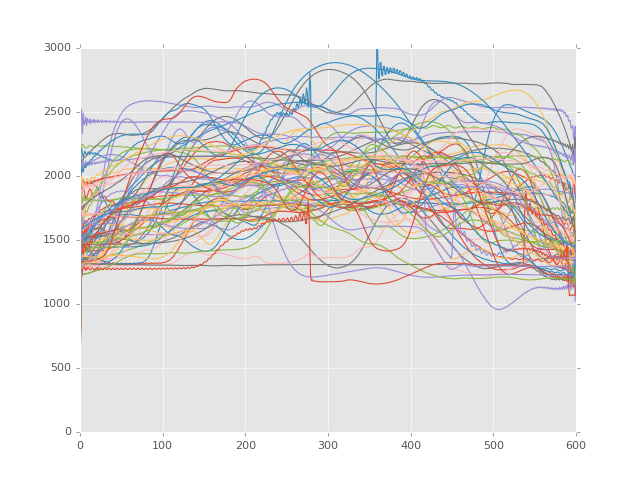

In [331]:
'''plot genre qoms'''
qomjo,qomvo,qomim,qomsc = ([]for i in range(4))
fig, ax1 = plt.subplots()
# for i in range(0,len(alljo)):
#     qomjo.append(qom(alljo[i]))
#     ax1.plot(qomjo[i])
# for i in range(0,len(allvo)):
#     qomvo.append(qom(allvo[i]))
#     ax1.plot(qomvo[i])
# for i in range(0,len(allsc)):
#     qomsc.append(qom(allsc[i]))
#     ax1.plot(qomsc[i])
for i in range(0,len(allim)):
    qomim.append(qom(allim[i]))
    ax1.plot(qomim[i])

<IPython.core.display.Javascript object>


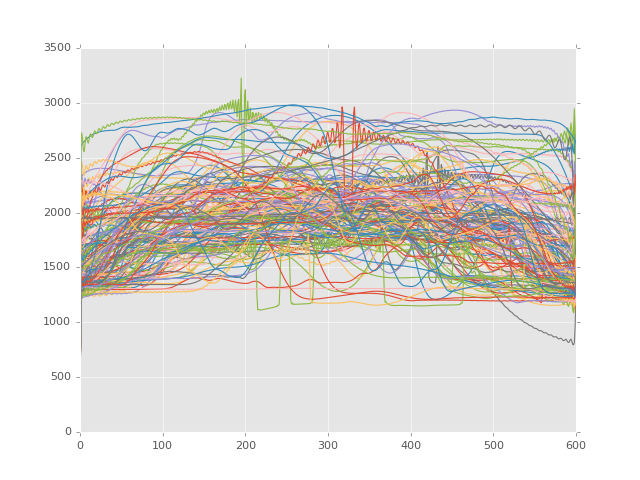

In [332]:
qomnorm = []
qomsyn = []
fig, ax2 = plt.subplots()
for i in range(0,len(synMels)):
    qomsyn.append(qom(synMels[i]))
    ax2.plot(qomsyn[i])

<IPython.core.display.Javascript object>


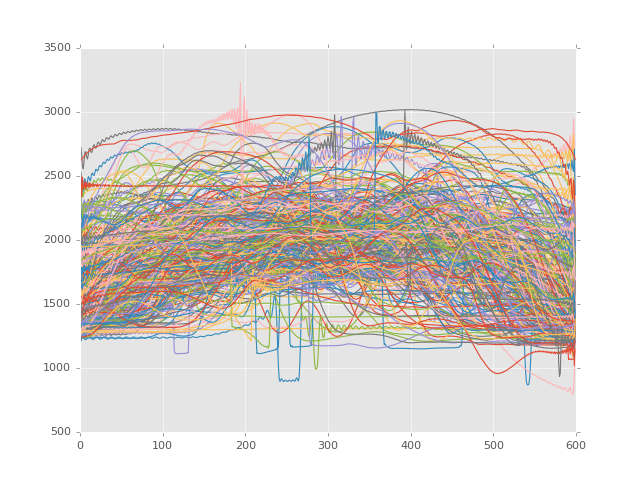

In [324]:
'''plot all qoms of strategies 1-6'''
qoms1,qoms2,qoms3,qoms4,qoms5,qoms6 = ([]for i in range(6))
fig, ax = plt.subplots()
for i in range(0,len(s1)):
    qoms1.append(qom(s1[i]))
    ax.plot(qoms1[i])
for i in range(0,len(s2)):
    qoms2.append(qom(s2[i]))
    ax.plot(qoms2[i])
for i in range(0,len(s3)):
    qoms3.append(qom(s3[i]))
    ax.plot(qoms3[i])
for i in range(0,len(s4)):
    qoms4.append(qom(s4[i]))
    ax.plot(qoms4[i])
for i in range(0,len(s5)):
    qoms5.append(qom(s5[i]))
    ax.plot(qoms5[i])
for i in range(0,len(s6)):
    qoms6.append(qom(s6[i]))
    ax.plot(qoms6[i])

In [360]:
'''plot all hands'''
# qomim[0]
# RHZ, RHY, RHX, LHZ, LHY, LHX = ([] for i in range(0,6))
# fig, ax3 = plt.subplots()
# fig, ax4 = plt.subplots()
# fig, ax5 = plt.subplots()
# fig, ax6 = plt.subplots()
# fig, ax7 = plt.subplots()
# fig, ax8 = plt.subplots()
# for i in range(0,len(pieces)):
#     RHZ.append(readfile(pieces[i])['RHZ'])
#     RHX.append(readfile(pieces[i])['RHX'])
#     RHY.append(readfile(pieces[i])['RHY'])
#     LHZ.append(readfile(pieces[i])['LHZ'])
#     LHX.append(readfile(pieces[i])['LHX'])
#     LHY.append(readfile(pieces[i])['LHY'])
#     ax3.plot(RHZ[i])
#     ax4.plot(RHX[i])
#     ax5.plot(RHY[i])
#     ax6.plot(LHZ[i])
#     ax7.plot(LHX[i])
#     ax8.plot(LHY[i])

# '''send all norm pieces to /data/normdatadump/'''
# for i in range(0,len(pieces)):
#     file_name = pieces[i]+'.csv'
#     y = upsamp(pieces[i])
#     y.to_csv(file_name,sep='\t')

'''normnorm'''


'normnorm'

<IPython.core.display.Javascript object>


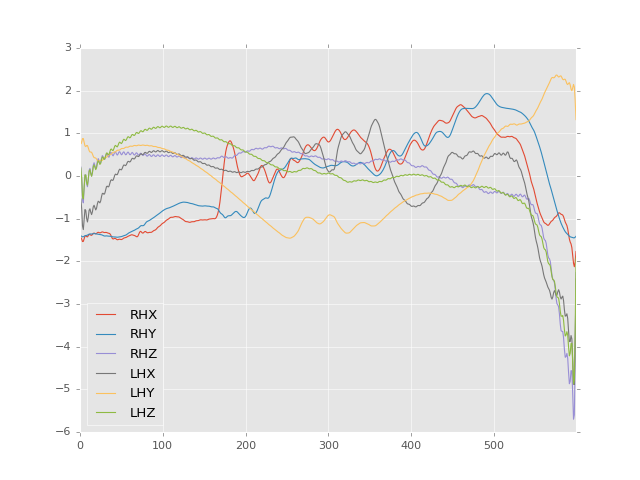

In [359]:
y = scale(y, axis=0, with_mean=True, with_std=True, copy=True )
y = pd.DataFrame(y)
y.columns = colHeads[1:]
y.iloc[:,2:8].plot()